# Exploratory Data Analysis SPORTS- IPL

# NAME - Medikonda.Siva

As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

In [1]:
#import the required liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_matches= pd.read_csv('matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df_deliveries= pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
df_matches= df_matches.drop(['umpire1', 'umpire2','umpire3'], axis=1)

In [7]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [9]:
df_matches.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [10]:
df_matches[df_matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


From above result, we can see that the null values in city are belongs to the matches played in year 2014. So, by web search i found that in year 2014 the IPL matches were played in dubai . Now , we can fill the values as Dubai.

In [11]:
df_matches.city = df_matches.city.fillna('Dubai')
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [12]:
df_matches[df_matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


In [13]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# ANALYSIS OF TEAMS

In [14]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [15]:
df_matches['winner'].replace(to_replace='Rising Pune Supergiant', value= 'Rising Pune Supergiants', inplace= True)

In [16]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Now, it has been fixed.

Total no. of teams particiaped in IPL:

In [17]:
len(teams)

14

Teams with most win

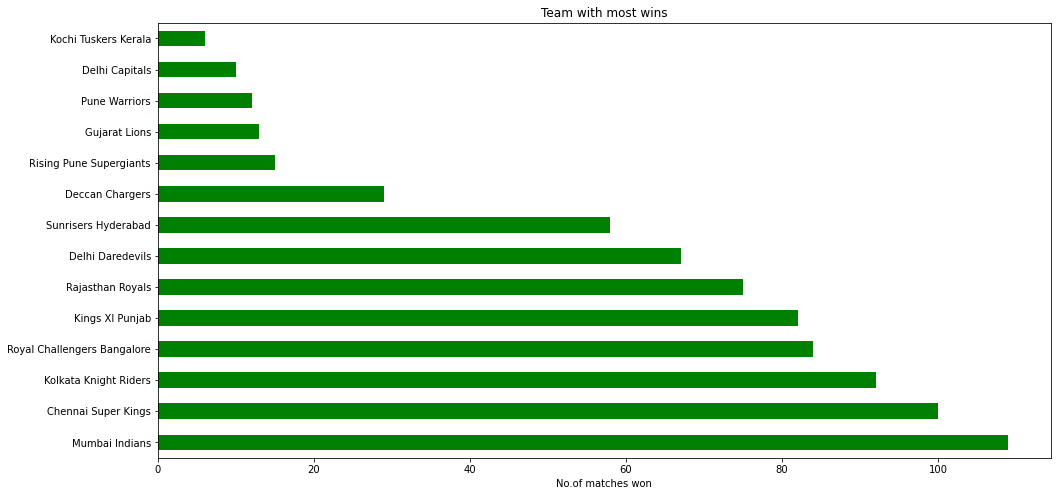

In [18]:
plt.figure(figsize=(16,8))
winner_matches=df_matches['winner'].value_counts().plot(kind='barh', color='green')
plt.title('Team with most wins')
plt.xlabel('No.of matches won')
plt.style.use('dark_background')

Mumbai indians won the maximum matches followed by CSK and KKR.


# Team with most IPL titles

In [19]:
#creating a new dataframe 

winning_teams=df_matches[['season','winner']]
winner_team = {}
for i in sorted(winning_teams.season.unique()):
    winner_team[i]=winning_teams[winning_teams.season==i]['winner'].tail(1).values[0]
    
winner_IPL= pd.Series(winner_team)
winner_IPL= pd.DataFrame(winner_IPL, columns= ['winner teams'])
print('season wise winner', winner_IPL)

season wise winner                winner teams
2008       Rajasthan Royals
2009        Deccan Chargers
2010    Chennai Super Kings
2011    Chennai Super Kings
2012  Kolkata Knight Riders
2013         Mumbai Indians
2014  Kolkata Knight Riders
2015         Mumbai Indians
2016    Sunrisers Hyderabad
2017         Mumbai Indians
2018    Chennai Super Kings
2019         Mumbai Indians


Text(0, 0.5, 'No. of season')

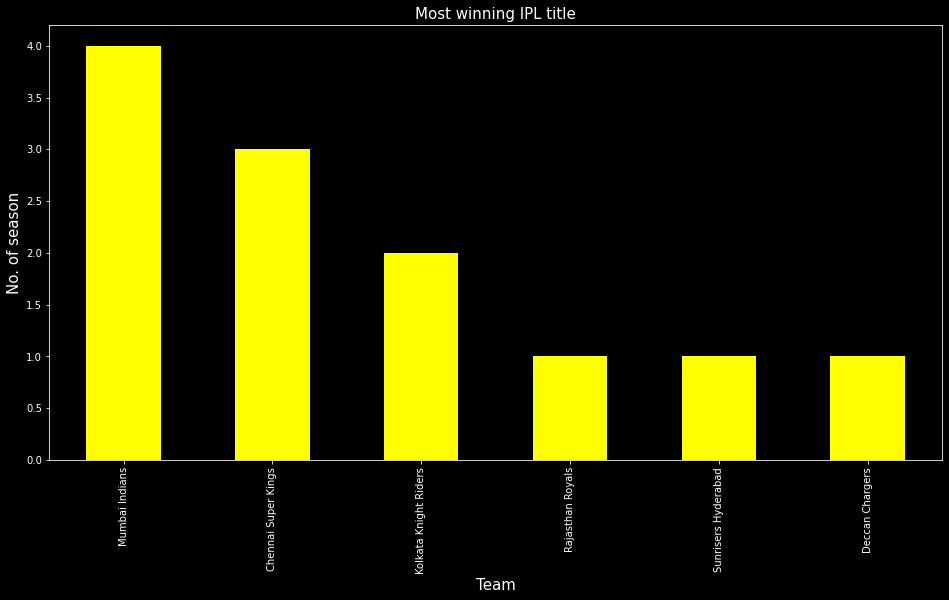

In [20]:
plt.figure(figsize=(16,8))
winner_IPL['winner teams'].value_counts().plot(kind='bar', color= 'yellow')
plt.title('Most winning IPL title', fontsize= 15)
plt.xlabel('Team', fontsize= 15)
plt.ylabel('No. of season', fontsize=15)

Mumbai indians won the maximum times in IPL followed by CSK & KKR.

# Team with most toss wins

In [21]:
most_toss_win= df_matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [22]:
df_matches['toss_winner'].replace(to_replace='Rising Pune Supergiant', value= 'Rising Pune Supergiants', inplace= True)

In [23]:
most_toss_win= df_matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

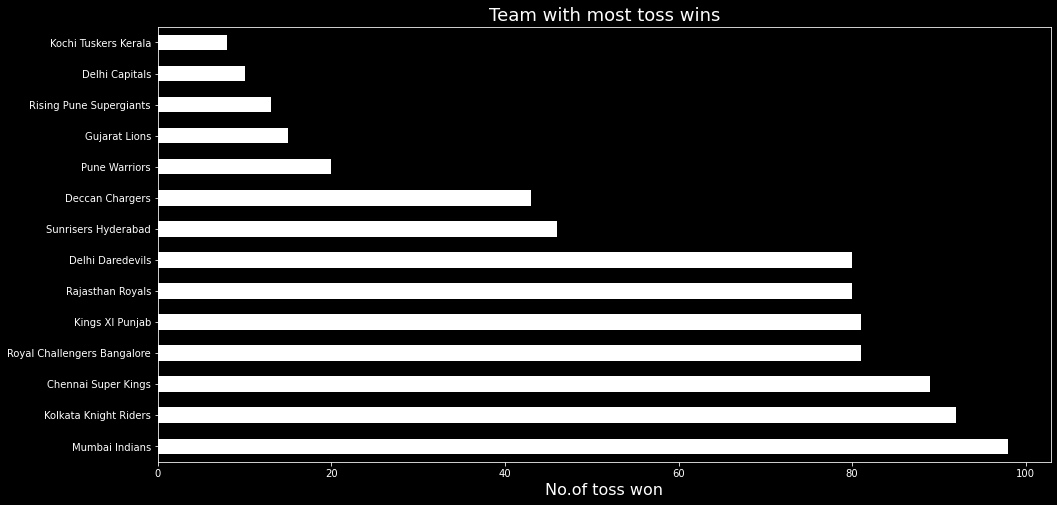

In [24]:
plt.figure(figsize=(16,8))
winner_matches=df_matches['toss_winner'].value_counts().plot(kind='barh', color='white')
plt.title('Team with most toss wins', fontsize=18)
plt.xlabel('No.of toss won', fontsize=16)
plt.style.use('dark_background')

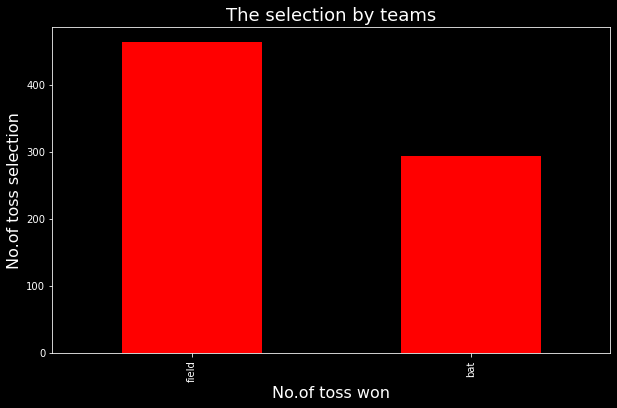

In [25]:
plt.figure(figsize=(10,6))
toss_decision=df_matches['toss_decision'].value_counts().plot(kind='bar', color='red')
plt.title('The selection by teams', fontsize=18)
plt.xlabel('No.of toss won', fontsize=16)
plt.ylabel('No.of toss selection', fontsize=16)
plt.style.use('dark_background')

Text(0, 0.5, 'Frequency')

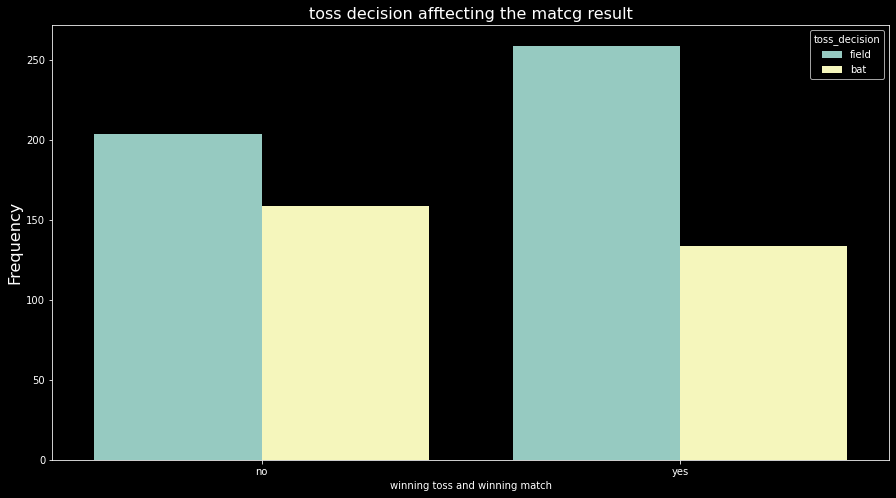

In [26]:
df_matches['tosswin_matchwin']= np.where((df_matches.toss_winner == df_matches.winner), 'yes', 'no')

plt.figure(figsize=(15,8))
sns.countplot(x='tosswin_matchwin', data= df_matches, hue= 'toss_decision')
plt.title('toss decision afftecting the matcg result', fontsize=16)
plt.xlabel('winning toss and winning match')
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

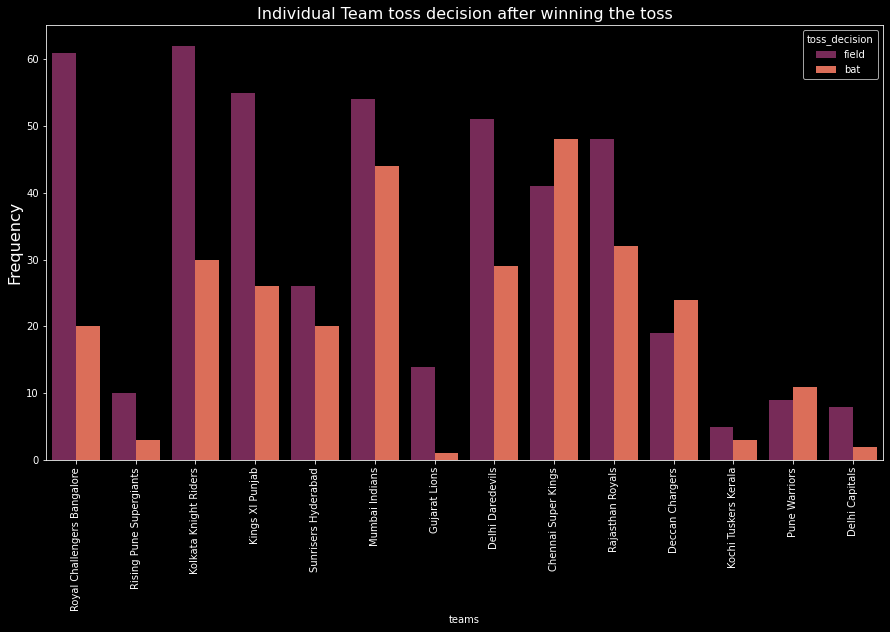

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner', data= df_matches, hue= 'toss_decision', palette= 'rocket' )
plt.title('Individual Team toss decision after winning the toss', fontsize=16)
plt.xlabel('teams')
plt.xticks(rotation= 90)
plt.ylabel('Frequency', fontsize=16)


Most teams field first after winning the toss except CSK , who mostly selected bat first.

Now , we'll check which Team winning the most by electing batting fisrt

In [29]:
most_wins_batting_first= df_matches.winner[df_matches.win_by_runs!=0].value_counts()
most_wins_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

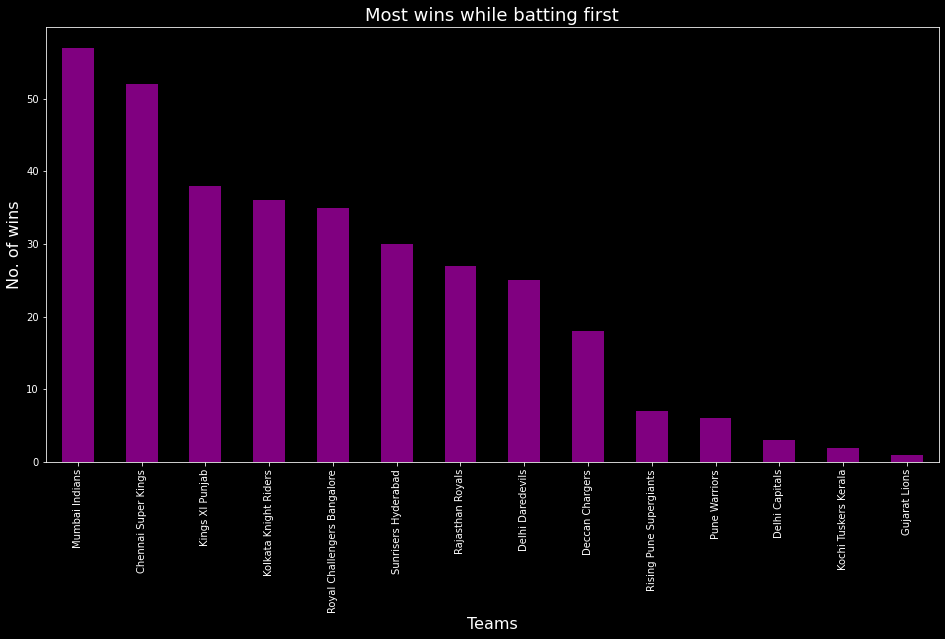

In [30]:
plt.figure(figsize=(16,8))
most_wins_batting_first= df_matches.winner[df_matches.win_by_runs!=0].value_counts().plot(kind='bar', color= 'purple')
plt.title('Most wins while batting first', fontsize=18)
plt.xlabel('Teams', fontsize=16)
plt.ylabel('No. of wins', fontsize=16)
plt.style.use('dark_background')

In [31]:
most_wins_batting_second= df_matches.winner[df_matches.win_by_wickets!=0].value_counts()
most_wins_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Delhi Capitals                  6
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

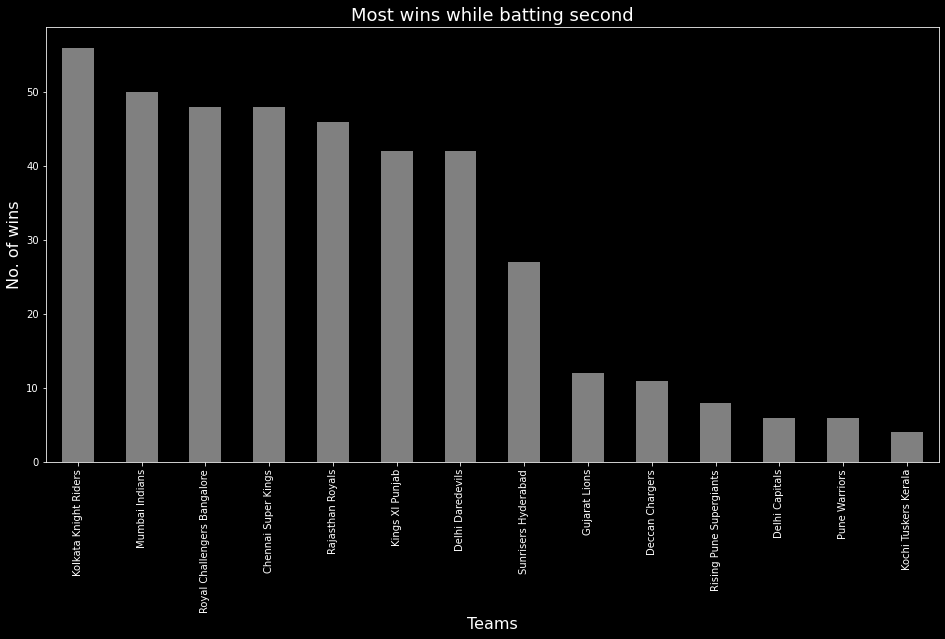

In [32]:
plt.figure(figsize=(16,8))
most_wins_batting_second= df_matches.winner[df_matches.win_by_wickets!=0].value_counts().plot(kind='bar', color= 'grey')
plt.title('Most wins while batting second', fontsize=18)
plt.xlabel('Teams', fontsize=16)
plt.ylabel('No. of wins', fontsize=16)
plt.style.use('dark_background')

Analysis Of teams - Observations:

"Mumabi indians" won maximum times followed by "CSK & KKR".
"Mumbai indians" won the IPL title maximum times followed by "CSK & KKR."
"Mumbai indians" won the toss maximum times followed by "KKR and CSK".
After winnimg the toss teams preferred to field first.
If team win the toss & electined to field first, that team won the match maximum no. of times.

# ANALYSIS OF IPL PLAYERS

In [33]:
most_player_of_match= df_matches['player_of_match'].value_counts().head(10)
most_player_of_match

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

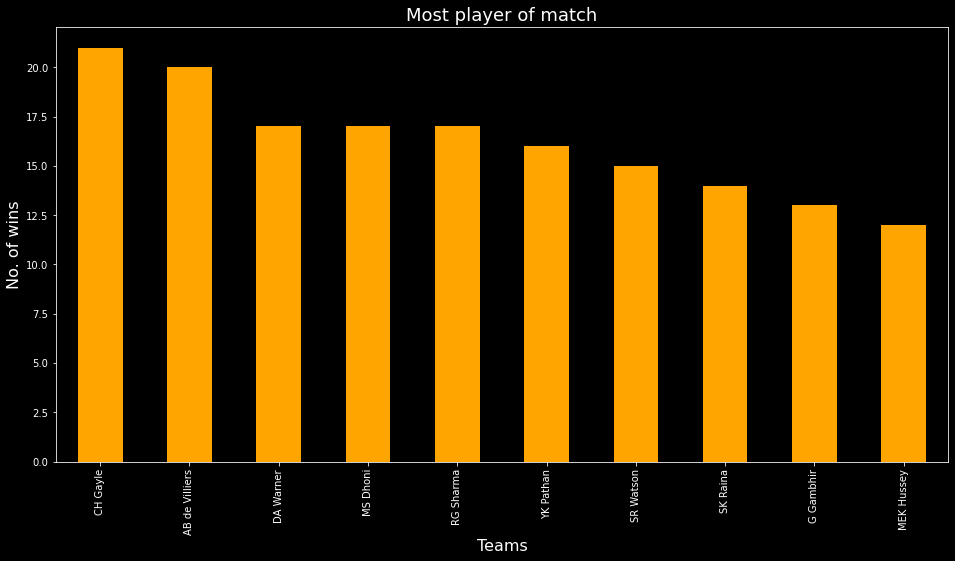

In [34]:
plt.figure(figsize=(16,8))
most_player_of_match= df_matches['player_of_match'].value_counts().head(10).plot(kind='bar', color= 'orange')
plt.title('Most player of match', fontsize=18)
plt.xlabel('Teams', fontsize=16)
plt.ylabel('No. of wins', fontsize=16)
plt.style.use('dark_background')

In [35]:
played_most_deliveries= df_deliveries['batsman'].value_counts()[0:10]
played_most_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

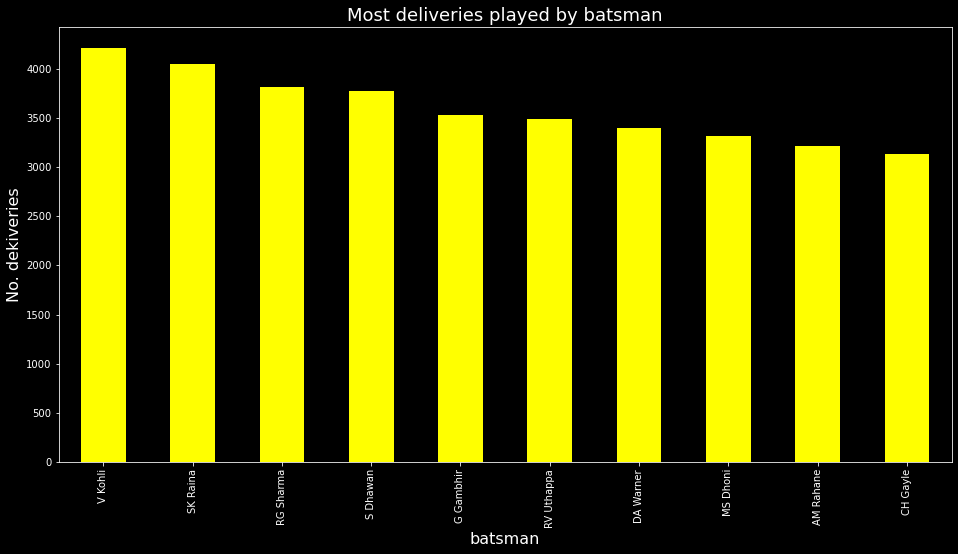

In [36]:
plt.figure(figsize=(16,8))
played_most_deliveries= df_deliveries['batsman'].value_counts()[0:10].plot(kind='bar', color= 'yellow')
plt.title('Most deliveries played by batsman', fontsize=18)
plt.xlabel('batsman', fontsize=16)
plt.ylabel('No. dekiveries', fontsize=16)
plt.style.use('dark_background')

In [37]:
bowl_most_deliveries= df_deliveries['bowler'].value_counts()[0:10]
bowl_most_deliveries

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

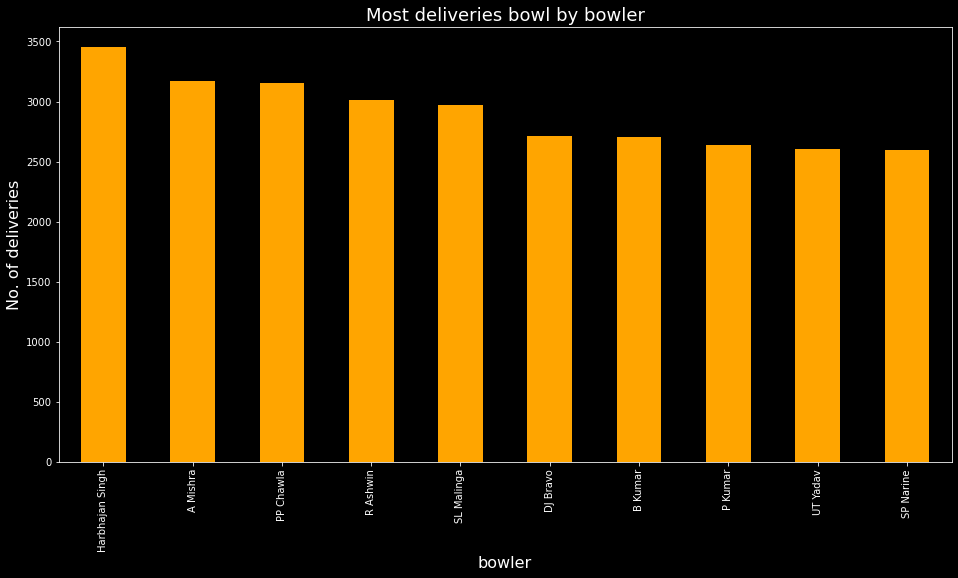

In [38]:
plt.figure(figsize=(16,8))
bowl_most_deliveries= df_deliveries['bowler'].value_counts()[0:10].plot(kind='bar', color= 'orange')
plt.title('Most deliveries bowl by bowler', fontsize=18)
plt.xlabel('bowler', fontsize=16)
plt.ylabel('No. of deliveries', fontsize=16)
plt.style.use('dark_background')

In [39]:
#merging the 2 dataset
df= pd.merge(df_deliveries, df_matches, left_on='match_id', right_on='id')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,tosswin_matchwin
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",no
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",no
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",no
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",no
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",no


Text(0, 0.5, 'Runs')

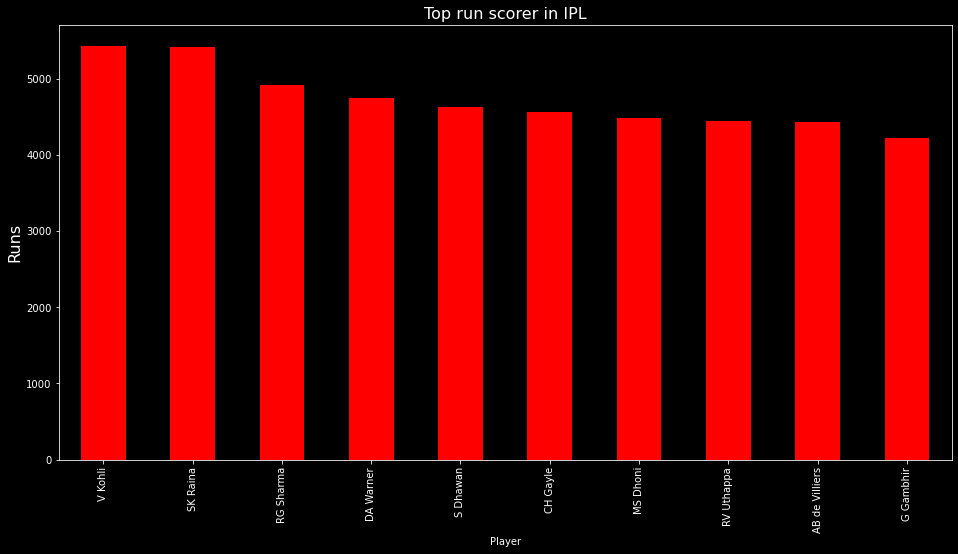

In [40]:
#using the merged dataset( matches and deliveries)
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False).head(10).plot(kind= 'bar', figsize=(16,8), color= 'red')
plt.title('Top run scorer in IPL', fontsize=16)
plt.xlabel('Player')
plt.xticks(rotation= 90)
plt.ylabel('Runs', fontsize=16)

Text(0, 0.5, 'Total wicket taken')

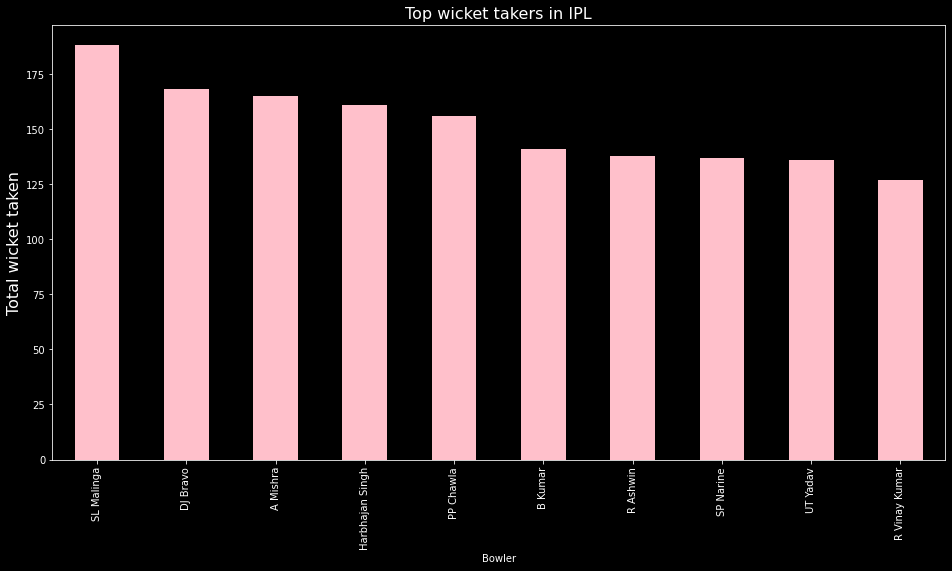

In [41]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending= False).head(10).plot(kind= 'bar', figsize=(16,8), color= 'pink')
plt.title('Top wicket takers in IPL', fontsize=16)
plt.xlabel('Bowler')
plt.xticks(rotation= 90)
plt.ylabel('Total wicket taken', fontsize=16)

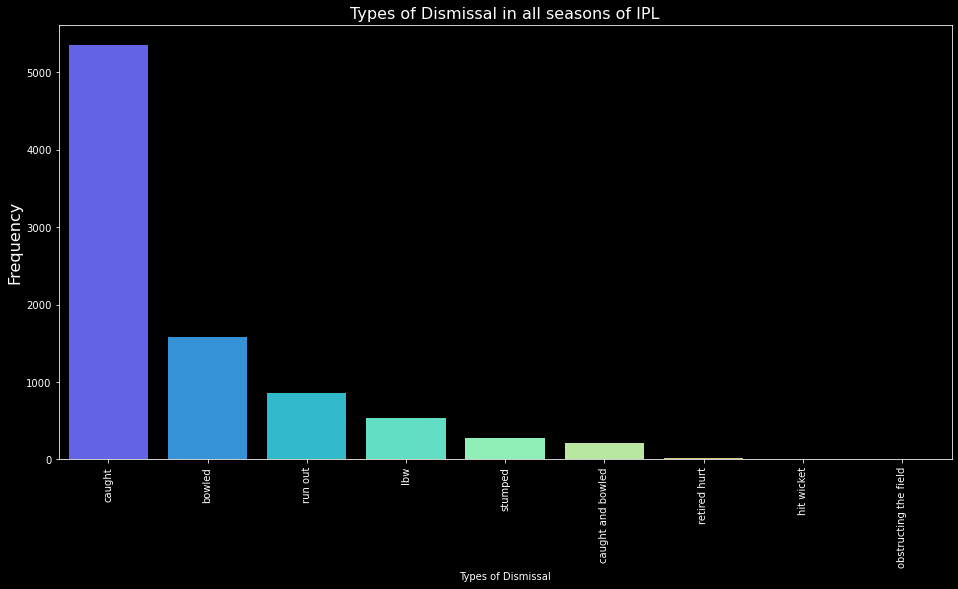

In [42]:
plt.figure(figsize=(16,8))
dismissal_type= df_deliveries.dismissal_kind.value_counts()
sns.barplot(x= dismissal_type.index, y= dismissal_type, palette='rainbow')

plt.title('Types of Dismissal in all seasons of IPL', fontsize=16)
plt.xlabel('Types of Dismissal')
plt.xticks(rotation= 90)
plt.ylabel('Frequency', fontsize=16)
plt.show()

Text(0, 0.5, 'Total runs')

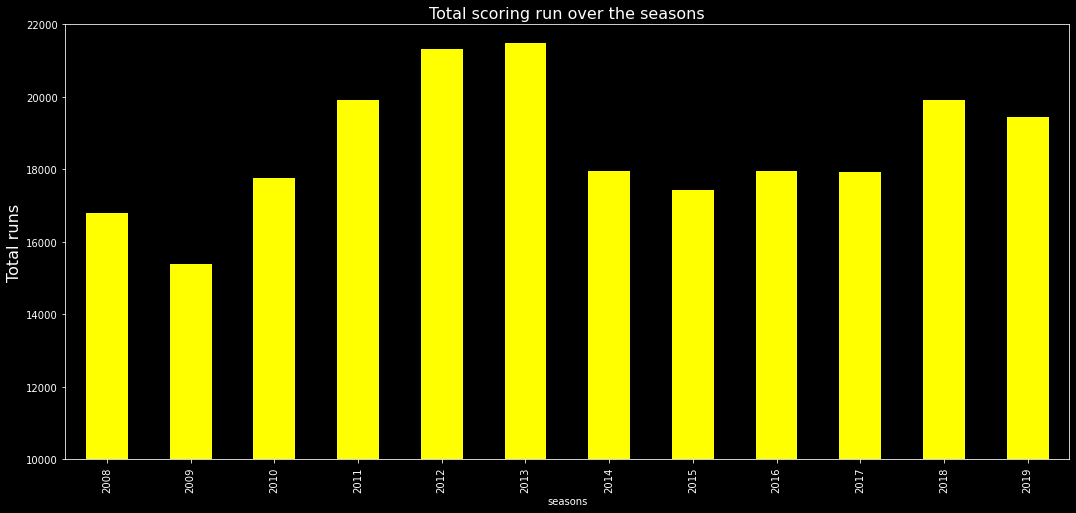

In [43]:
df.groupby('season')['batsman_runs'].sum().plot(kind='bar', figsize=(18,8), color= 'yellow')
plt.title('Total scoring run over the seasons', fontsize=16)
plt.xlabel('seasons')
plt.ylim(10000, 22000)
plt.ylabel('Total runs', fontsize=16)

ANALYSIS OF IPL PLAYERS- OBSERVATIONS:

1  CH GAYLE won the man of the match title maximum no. of times.
2  V Kohli Played the maximum no. of deliveries.
3  Harbhajan Singh bowl the maximum no. of deliveries.
4  Malinga has taken the maximum no. of wickets.
5  Caught was most dismissal in all the IPL seasons.

# Conclusion:

From above analysis we can suggest a company to endorse MUMBAI INDIANS , CSK and in player category Gayle & Virat Kohli.

